# <span style="color:blue"> Tutorial 6, Question 2 </span>
Given the following data pairs for training:
1. Perform a 3rd-order polynomial regression and sketch the result of line fitting.
2. Given a test point { 𝑥=9 } predict 𝑦 using the polynomial model.
3. Compare this prediction with that of a linear regression.

w
[ 2.68935636 -0.37722517  0.01343815  0.00285772]
y_predict
[2.46609771]
ploy_model
[ 0.         -0.37722517  0.01343815  0.00285772]
2.6893563584656928
Predicted y for x=9 using the 3rd-order polynomial model: 2.466097711361895
Predicted y for x=9 using the linear regression model: 1.3302752293577975


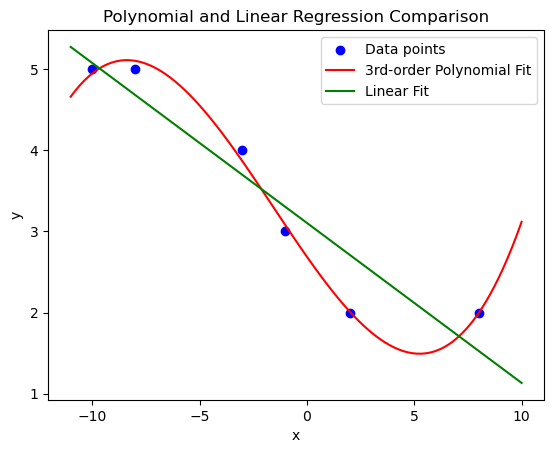

In [4]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Given data
x = np.array([-10, -8, -3, -1, 2, 8]).reshape(-1, 1)
y = np.array([5, 5, 4, 3, 2, 2])

# (a) 3rd-order polynomial regression
poly_features = PolynomialFeatures(degree=3)
x_poly = poly_features.fit_transform(x)

# Method I: using primal form
P = x_poly
w = inv(P.T @ P) @ P.T @ y
print('w')
print(w)

Xt = np.array([[9]])
Pt = poly_features.fit_transform(Xt)
y_predict = Pt @ w
print('y_predict')
print(y_predict)

# Method II
# Fit the polynomial regression model
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
print('ploy_model')
print(poly_model.coef_)
print(poly_model.intercept_)

# Predictions for the polynomial model
x_new = np.linspace(-11, 10, 100).reshape(-1, 1)
x_new_poly = poly_features.transform(x_new)
y_poly_pred = poly_model.predict(x_new_poly)

# (b) Predict y for x=9 using the polynomial model
x_test = np.array([[9]])
x_test_poly = poly_features.transform(x_test)
y_pred_poly = poly_model.predict(x_test_poly)

print(f"Predicted y for x=9 using the 3rd-order polynomial model: {y_pred_poly[0]}")

# (c) Linear regression for comparison
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(np.array([[9]]))

print(f"Predicted y for x=9 using the linear regression model: {y_pred_linear[0]}")

# Plotting the results
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_new, y_poly_pred, color='red', label='3rd-order Polynomial Fit')
plt.plot(x_new, linear_model.predict(x_new), color='green', label='Linear Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial and Linear Regression Comparison')
plt.show()